<a href="https://colab.research.google.com/github/RuthCMoreno/Diplomado_IA/blob/main/S6_C2_ModeloRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Machine Learning Regression

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import os #permite leer rutas de carpetas


In [71]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/archivosIA')

In [72]:
os.listdir()

['marketing_extract_2X_Income (1).xlsx']

In [73]:
df = pd.read_excel('marketing_extract_2X_Income (1).xlsx')

# Análisis descriptivo

In [74]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2216 non-null   int64
 1   MntWines         2216 non-null   int64
 2   Income           2216 non-null   int64
dtypes: int64(3)
memory usage: 52.1 KB


In [75]:
df.shape

(2216, 3)

In [76]:
df.describe()

,MntMeatProducts,MntWines,Income
count,2216.000000,2216.000000,2216.000000
mean,166.995939,305.091606,52247.251354
std,224.283273,337.327920,25173.076661
min,0.000000,0.000000,1730.000000
25%,16.000000,24.000000,35303.000000
50%,68.000000,174.500000,51381.500000
75%,232.250000,505.000000,68522.000000
max,1725.000000,1493.000000,666666.000000


# Análisis exploratorio

Text(0, 0.5, 'Income: Ingreso anual')

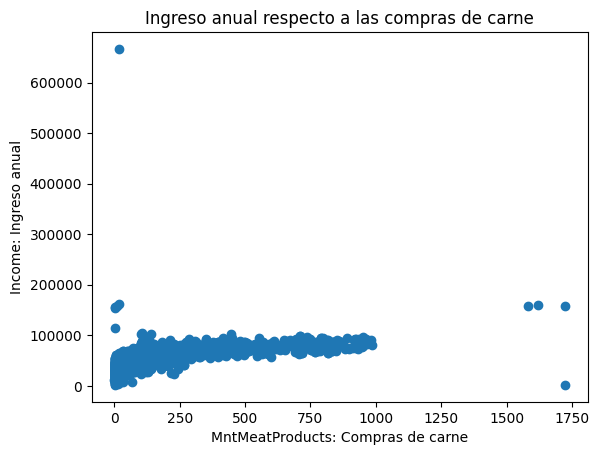

In [77]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

# Datos atípicos Variable X : Compras de carne e Y : Ingreso anual

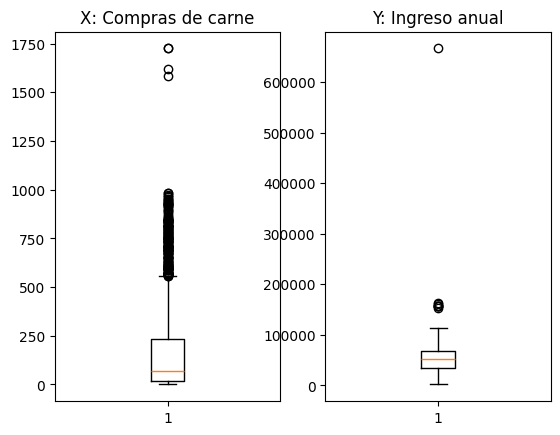

In [78]:
plt.subplot(1,2,1) #aquí estoy dividiendo en una fila dos columnas
plt.boxplot(x)
plt.title('X: Compras de carne')
plt.subplot(1,2,2)
plt.boxplot(y)
plt.title('Y: Ingreso anual')
plt.show()

In [79]:
x_Q1 = x.quantile(0.25)
x_Q3 = x.quantile(0.75)
x_IQR = x_Q3 - x_Q1

In [80]:
x_Q1

16.0

In [81]:
x_Q3

232.25

In [82]:
x_IQR

216.25

In [83]:
y_Q1 = y.quantile(0.25)
y_Q3 = y.quantile(0.75)
y_IQR = y_Q3 - y_Q1
#

ahora necesito una condición para eliminar los datos atípicos, basada en el rango intercuartílico obtenido para las variables x e y

In [84]:
df = df[(df['MntMeatProducts'] >= x_Q1 - 1.5*x_IQR) & (df['MntMeatProducts'] <= x_Q3 + 1.5*x_IQR)]  #x sería entonces el df comprendido en el rango
df = df[(df['Income'] >= y_Q1 - 1.5*y_IQR) & (df['Income'] <= y_Q3 + 1.5*y_IQR)]  #y sería entonces el df comprendido en el rango

# Datos procesados

Text(0, 0.5, 'Income: Ingreso anual')

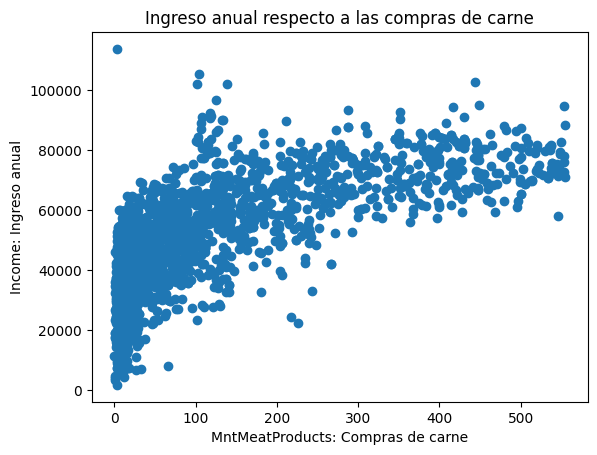

In [85]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

# Entrenar el modelo de Machine Learning

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [92]:
#Paso 1 : Definir el conjunto de entrenamiento
#Target Objetivo es la variable a predecir
#y: income
y = df['Income']
#caracteristicas: Atributos
x = df[['MntMeatProducts']] #Esto es para solo traer una columna

In [93]:
#Paso 2: hacer la división de los conjuntos para entrenar (fit) y validar (test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
#Paso 3: Definir el modelo
modelo = LinearRegression()

In [95]:
#Paso 4: Entrenar, es el proceso de ajuste para obtener el modelo
modelo.fit(x_train, y_train)

LinearRegression()

In [96]:
modelo.coef_ #m la pendiente de la recta

array([101.02928705])

In [98]:
modelo.intercept_ # b, punto de corte en el eje y

37309.831062988786

In [99]:
X_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Valores equidistantes
y_range = modelo.predict(X_range)  # Predicción para la línea recta

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([108030.33199754])

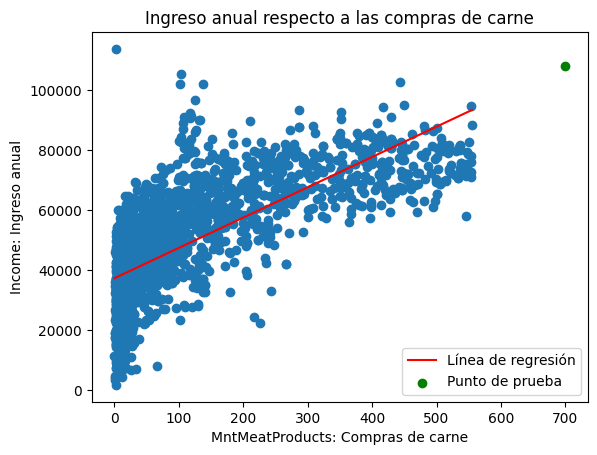

In [108]:
x = df['MntMeatProducts']
y = df['Income']
plt.scatter(x,y)
plt.title('Ingreso anual respecto a las compras de carne')
plt.xlabel('MntMeatProducts: Compras de carne')
plt.ylabel('Income: Ingreso anual')

plt.plot(X_range, y_range, color='red', label='Línea de regresión')  #un plot une con líneas los puntos, por eso es más confuso, mientras que el scatter pone solo los puntos
plt.legend()
#Usando el modelo deducido (la línea) vamos a hacer cálculos de Y probando datos de X, o sea vamos a predecir Y
X_prueba = 700
y_predicha = modelo.predict([[X_prueba]])
plt.scatter(X_prueba, y_predicha,  color='green', label='Punto de prueba')
plt.legend()
y_predicha

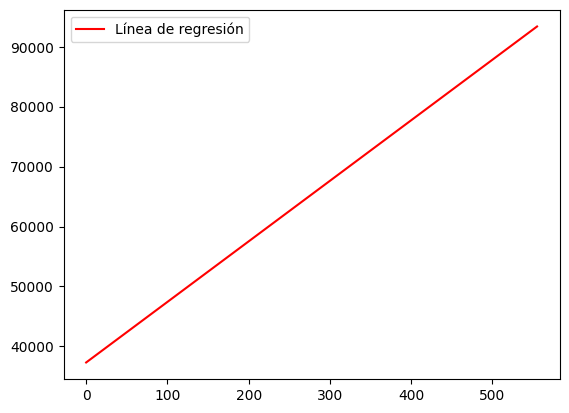

In [106]:
plt.plot(X_range, y_range, color='red', label='Línea de regresión')  #un plot une con líneas los puntos, por eso es más confuso, mientras que el scatter pone solo los puntos
plt.legend()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([108030.33199754])

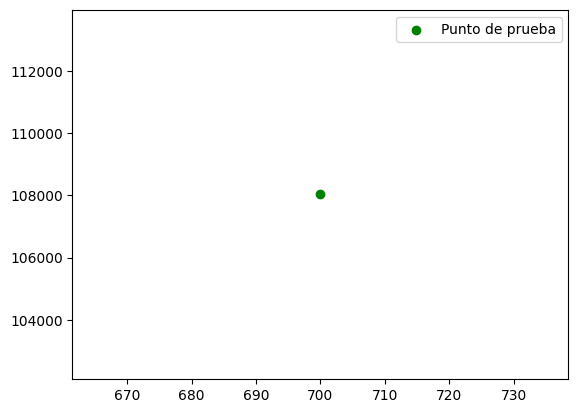

In [107]:
#Usando el modelo deducido (la línea) vamos a hacer cálculos de Y probando datos de X, o sea vamos a predecir Y
X_prueba = 700
y_predicha = modelo.predict([[X_prueba]])
plt.scatter(X_prueba, y_predicha,  color='green', label='Punto de prueba')
plt.legend()
y_predicha

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MntMeatProducts  2037 non-null   int64
 1   MntWines         2037 non-null   int64
 2   Income           2037 non-null   int64
dtypes: int64(3)
memory usage: 63.7 KB
